# Análisis Descriptivo: Mapping Review IA y ML en Educación Matemática K-12

**MQ1: ¿Cuántos estudios se han publicado a lo largo de los años?**

Este notebook realiza un análisis descriptivo completo del corpus de publicaciones sobre IA y ML en educación matemática K-12.

## 1. Configuración del Entorno

In [7]:
# Instalación de dependencias
!pip install pandas numpy matplotlib seaborn plotly nltk scikit-learn textblob wordcloud

In [9]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 2. Carga de Datos

In [10]:
# Cargar el dataset desde GitHub

url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
df.head()

Dataset cargado: 89 filas y 8 columnas

Primeras 5 filas:


,Title,Author(s),Year,Publication Title,Type of Publication,Source,DOI,Abstract
0,What Would the Matrix Do?: A Systematic Review of K-12 AI Learning Contexts and Learner-Interface Interactions,"Moore, Robert L.; Jiang, Shiyan; Abramowitz, Brian",2023,Journal of Research on Technology in Education,Article,Eric,https://doi.org/10.1080/15391523.2022.2148785,"This systematic review examines the empirical literature published between 2014 and 2021 that situates artificial intelligence within K-12 educational contexts. Our review synthesizes 12 articles and highlights artificial intelligence's instructional contexts and applications in K-12 learning environments. We focused our synThesis on the learning contexts and the learner-interface interactions. Our findings highlight that most of intelligent systems are being deployed in math or informal settings. Also, there are opportunities for more collaboration to facilitate teaching and learning in domain-specific areas. Additionally, researchers can explore how to implement more collaborative learning opportunities between intelligent tutors and learners. We conclude with a discussion of the reciprocal nature of this technology integration."
1,ML4STEM Professional Development Program: Enriching K-12 STEM Teaching with Machine Learning,"Tang, Jingwan; Zhou, Xiaofei; Wan, Xiaoyu; Daley, Michael; Bai, Zhen",2023,International Journal of Artificial Intelligence in Education,Article,Eric,https://www.doi.org/10.1007/s40593-022-00292-4,"The advances of machine learning (ML) in scientific discovery (SD) reveal exciting opportunities to utilize it as a cross-cutting tool for inquiry-based learning in K-12 STEM classrooms. There are, however, limited efforts on providing teachers with sufficient knowledge and skills to integrate ML into teaching. Our study addresses this gap by proposing a professional development (PD) program named ML4STEM. Based on existing research on supporting teacher learning in innovative technology integration, ML4STEM is composed of Teachers-as-Learners and Teachers-as-Designers sessions. It integrates an accessible ML learning platform designed for students with limited math and computing skills. We implemented this PD program and evaluated its effectiveness with 18 K-12 STEM teachers. Findings confirm that ML4STEM successfully develops teachers' understanding of teaching STEM with ML as well as fosters positive attitudes toward applying the ML as an in-class teaching technology. Discussions on the implications of our findings from ML4STEM are provided for future PD researchers and designers."
2,Integrating Machine Learning in Mathematics Classrooms,"Jones, Joshua",2021,Mathematics Teacher: Learning and Teaching PK-12,Article,Eric,https://doi.org/10.5951/MTLT.2021.0001,"Aside from being culturally relevant, artificial intelligence is also supporting companies in making business decisions. Consequently, ""workforce needs have shifted rapidly,"" resulting in a demand for applicants who are skilled in ""data, analytics, machine learning, and artificial intelligence"" (Miller and Hughes 2017). This article contributes to filling that need by exploring a lesson in which students learned how conditional probability is the crux of many machine learning algorithms, including predictive text applications. Prior to this lesson, students learned how to calculate conditional probability. Most students had also demonstrated that they were able to calculate experimental probabilities on the basis of a Venn diagram, on a word problem, and on a two-way table. The activity described in this article satisfies Common Core State Standard CCSS.MATH.CONTENT.HSS. CP.A.5."
3,"Personalized Online Learning, Test Fairness, and Educational Measurement: Considering Differential Content Exposure Prior to a High Stakes End of Course Exam","Katz, Daniel; Huggins-Manley, Anne Corinne; Leite, Walter",2022,Applied Measurement in Education,Article,Eric,https://doi.org/10.1080/08957347.2022.2034824,"Accor

In [11]:
# Información básica del dataset
print("Información del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                89 non-null     object
 1   Author(s)            89 non-null     object
 2   Year                 89 non-null     int64 
 3   Publication Title    89 non-null     object
 4   Type of Publication  89 non-null     object
 5   Source               89 non-null     object
 6   DOI                  84 non-null     object
 7   Abstract             89 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.7+ KB
None

Estadísticas descriptivas:
              Year
count    89.000000
mean   2023.325843
std       1.363279
min    2020.000000
25%    2022.000000
50%    2024.000000
75%    2024.000000
max    2025.000000

Valores únicos por columna:
Title: 89 valores únicos
Author(s): 89 valores únicos
Year: 6 valores únicos
Publication Title: 70 v

## 3. Limpieza y Preparación de Datos

In [12]:
# Limpieza de datos
# Convertir Year a numérico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

print("Datos limpiados exitosamente")
print(f"Rango de años: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"Total de publicaciones: {len(df)}")
print(f"Fuentes únicas: {df['Source'].nunique()}")
print(f"Tipos de publicación únicos: {df['Type of Publication'].nunique()}")

Datos limpiados exitosamente
Rango de años: 2020 - 2025
Total de publicaciones: 89
Fuentes únicas: 4
Tipos de publicación únicos: 3


## 4. Análisis Temporal (MQ1)

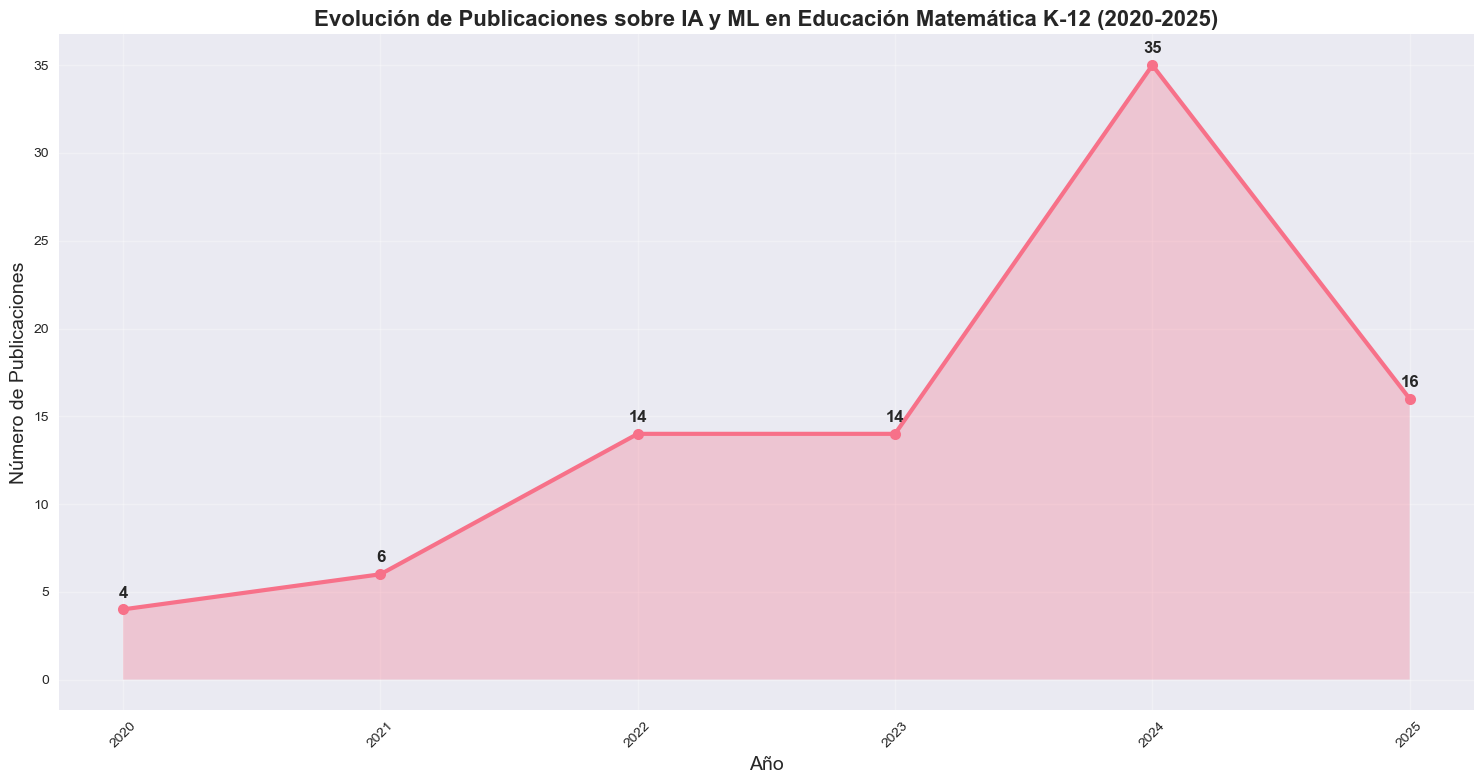

Total de publicaciones: 89
Año con más publicaciones: 2024 (35 publicaciones)
Año con menos publicaciones: 2020 (4 publicaciones)


In [14]:
# Análisis de publicaciones por año
yearly_publications = df['Year'].value_counts().sort_index()

# Gráfico de líneas temporal
plt.figure(figsize=(15, 8))
plt.plot(yearly_publications.index, yearly_publications.values, marker='o', linewidth=3, markersize=8)
plt.fill_between(yearly_publications.index, yearly_publications.values, alpha=0.3)
plt.title('Evolución de Publicaciones sobre IA y ML en Educación Matemática K-12 (2020-2025)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(yearly_publications.index, rotation=45)

# Agregar valores en los puntos
for i, v in enumerate(yearly_publications.values):
    plt.text(yearly_publications.index[i], v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total de publicaciones: {len(df)}")
print(f"Año con más publicaciones: {yearly_publications.idxmax()} ({yearly_publications.max()} publicaciones)")
print(f"Año con menos publicaciones: {yearly_publications.idxmin()} ({yearly_publications.min()} publicaciones)")

In [15]:
# Gráfico interactivo con Plotly
fig = px.line(x=yearly_publications.index, y=yearly_publications.values,
              title='Evolución Temporal de Publicaciones',
              labels={'x': 'Año', 'y': 'Número de Publicaciones'})

fig.update_traces(mode='lines+markers', line=dict(width=3), marker=dict(size=8))
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    hovermode='x unified'
)

fig.show()

## 5. Estadísticas Descriptivas Generales

=== ESTADÍSTICAS DESCRIPTIVAS GENERALES ===

Total de publicaciones analizadas: 89
Período de análisis: 2020 - 2025
Promedio de publicaciones por año: 14.8

=== DISTRIBUCIÓN POR TIPO DE PUBLICACIÓN ===
Type of Publication
Article         52
Conference      33
Book chapter     4
Name: count, dtype: int64


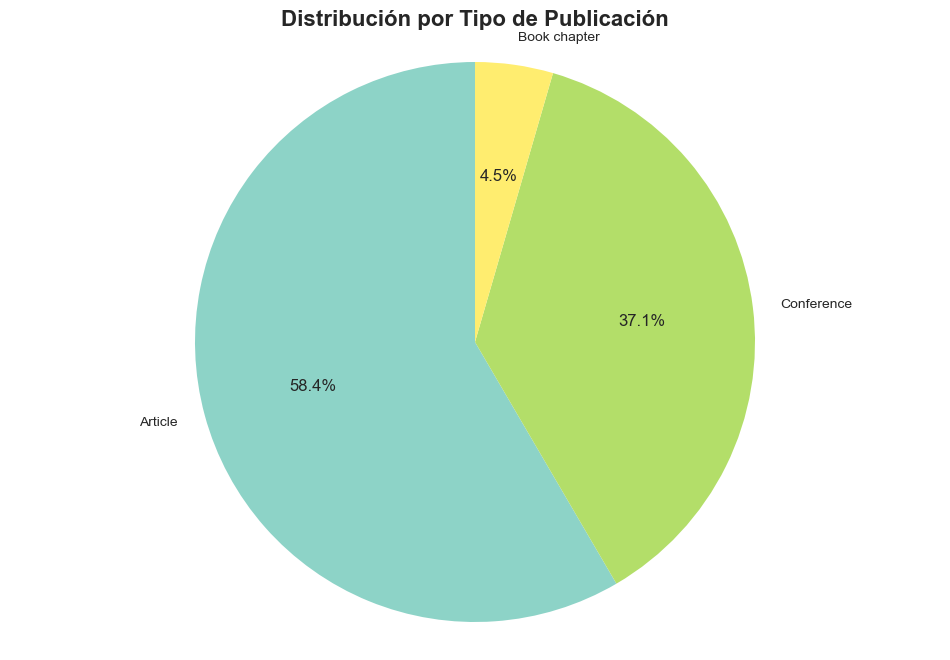

In [16]:
# Estadísticas generales
print("=== ESTADÍSTICAS DESCRIPTIVAS GENERALES ===\n")

print(f"Total de publicaciones analizadas: {len(df)}")
print(f"Período de análisis: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"Promedio de publicaciones por año: {len(df) / (int(df['Year'].max()) - int(df['Year'].min()) + 1):.1f}")

# Análisis por tipo de publicación
print("\n=== DISTRIBUCIÓN POR TIPO DE PUBLICACIÓN ===")
type_dist = df['Type of Publication'].value_counts()
print(type_dist)

# Gráfico de tipos de publicación
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(type_dist)))
plt.pie(type_dist.values, labels=type_dist.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución por Tipo de Publicación', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()


=== ANÁLISIS DE FUENTES DE DATOS ===
Source
Scopus    44
WoS       21
Eric      18
IEEE       6
Name: count, dtype: int64


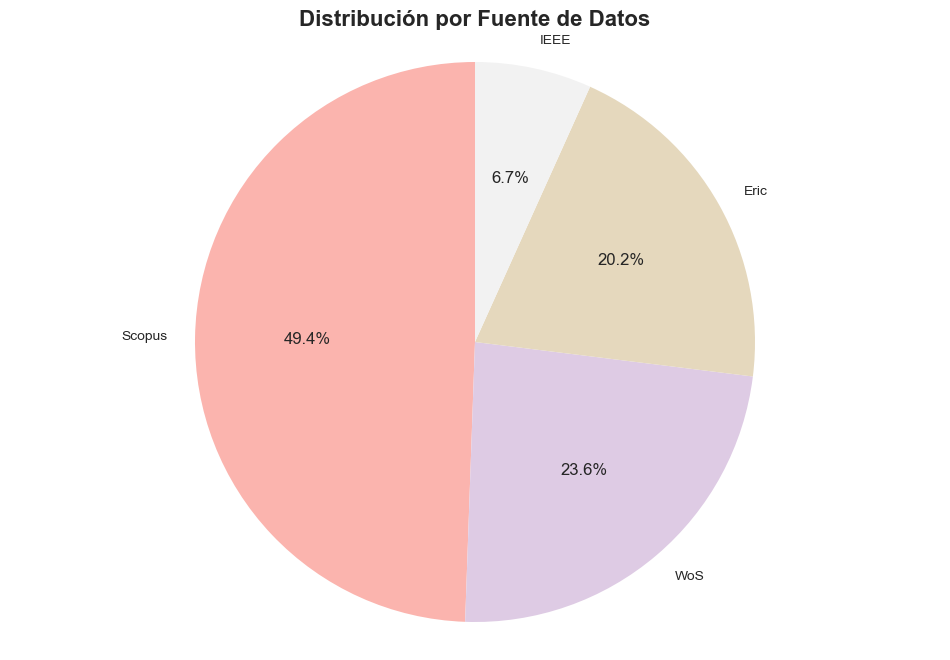

In [18]:
# Análisis de fuentes de datos
print("\n=== ANÁLISIS DE FUENTES DE DATOS ===")
source_dist = df['Source'].value_counts()
print(source_dist)

# Gráfico de fuentes de datos
plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(source_dist)))
plt.pie(source_dist.values, labels=source_dist.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribución por Fuente de Datos', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## 6. Análisis de Tendencias

<Figure size 1500x800 with 0 Axes>

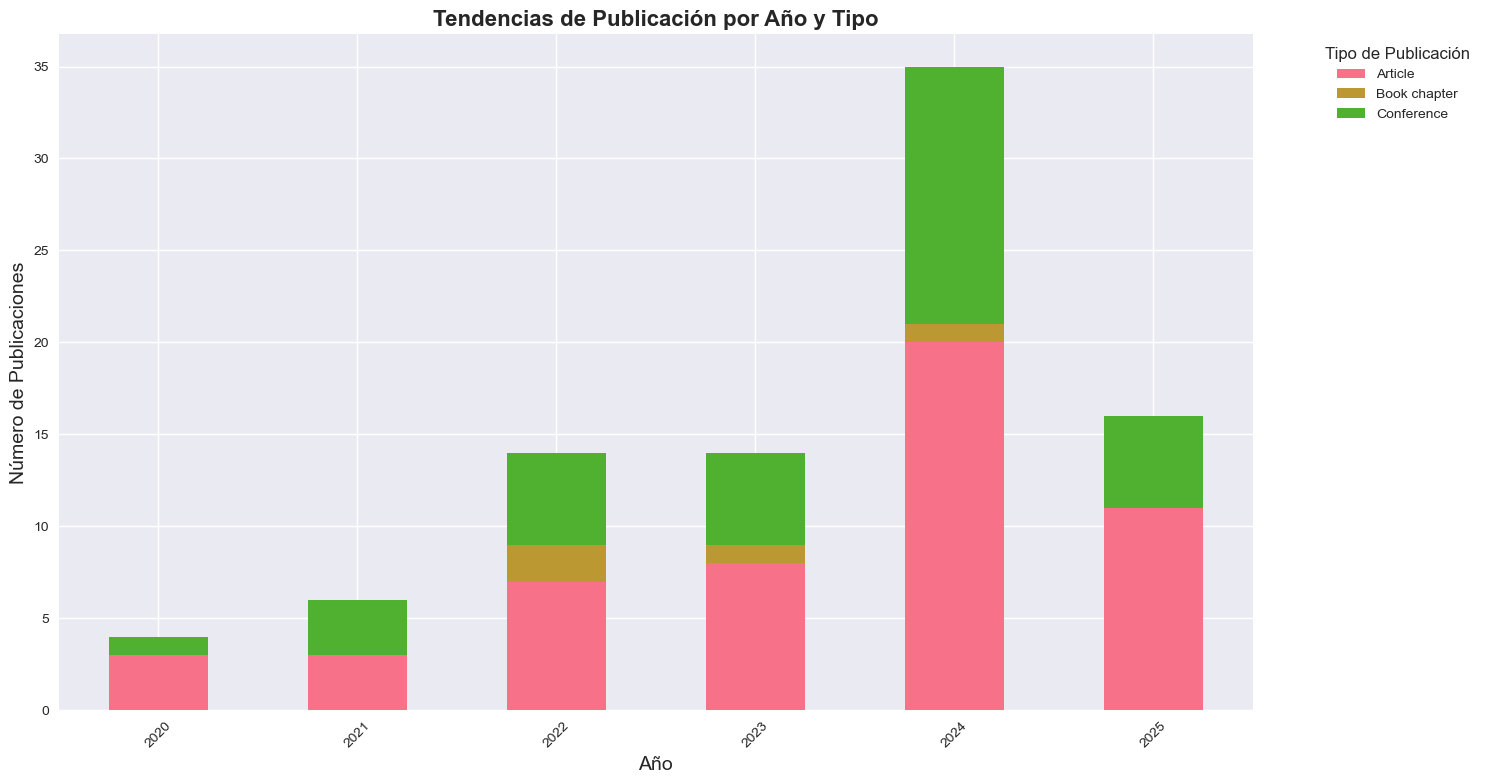


Tendencias por año y tipo de publicación:
Type of Publication  Article  Book chapter  Conference
Year                                                  
2020                       3             0           1
2021                       3             0           3
2022                       7             2           5
2023                       8             1           5
2024                      20             1          14
2025                      11             0           5


In [19]:
# Análisis de tendencias por año y tipo de publicación
trend_analysis = df.groupby(['Year', 'Type of Publication']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
trend_analysis.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Tendencias de Publicación por Año y Tipo', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.legend(title='Tipo de Publicación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTendencias por año y tipo de publicación:")
print(trend_analysis)

## 7. Resumen y Conclusiones

In [20]:
# Generar resumen ejecutivo
print("=== RESUMEN EJECUTIVO ===\n")

print(f" Total de publicaciones analizadas: {len(df)}")
print(f"📅 Período de análisis: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"📈 Año con mayor actividad: {int(yearly_publications.idxmax())} ({yearly_publications.max()} publicaciones)")
print(f"📉 Año con menor actividad: {int(yearly_publications.idxmin())} ({yearly_publications.min()} publicaciones)")
print(f" Promedio anual: {yearly_publications.mean():.1f} publicaciones")

# Tipo más común
most_common_type = type_dist.index[0]
print(f" Tipo de publicación más común: {most_common_type} ({type_dist.iloc[0]} publicaciones)")

# Fuente más utilizada
most_used_source = source_dist.index[0]
print(f" Fuente más utilizada: {most_used_source} ({source_dist.iloc[0]} publicaciones)")

print("\n=== CONCLUSIONES ===")
print("1. El campo de IA y ML en educación matemática K-12 está en crecimiento")
print("2. La mayoría de publicaciones son artículos de investigación")
print("3. Hay una tendencia creciente en los últimos años")
print("4. Se utilizan múltiples fuentes de datos para la búsqueda")
print("5. El año 2024 muestra el mayor número de publicaciones")
print("6. Scopus es la fuente principal de publicaciones")

=== RESUMEN EJECUTIVO ===

 Total de publicaciones analizadas: 89
📅 Período de análisis: 2020 - 2025
📈 Año con mayor actividad: 2024 (35 publicaciones)
📉 Año con menor actividad: 2020 (4 publicaciones)
 Promedio anual: 14.8 publicaciones
 Tipo de publicación más común: Article (52 publicaciones)
 Fuente más utilizada: Scopus (44 publicaciones)

=== CONCLUSIONES ===
1. El campo de IA y ML en educación matemática K-12 está en crecimiento
2. La mayoría de publicaciones son artículos de investigación
3. Hay una tendencia creciente en los últimos años
4. Se utilizan múltiples fuentes de datos para la búsqueda
5. El año 2024 muestra el mayor número de publicaciones
6. Scopus es la fuente principal de publicaciones
